In [1]:
from lsst.analysis.tools.tasks.reconstructor import reconstructAnalysisTools
from lsst.daf.butler import Butler
from lsst.analysis.tools.interfaces._task import _StandinPlotInfo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy.units as u

In [2]:
repo = '/repo/ops-rehearsal-3-prep'
collection = 'u/homer/htc-test1'

butler = Butler(repo, collections=collection)
registry = butler.registry

In [3]:
mytract = 9813
skymap = butler.get('skyMap', skymap='DC2')
tract = skymap.generateTract(mytract)
sp2 = tract.getCtrCoord()
sp2

SpherePoint(150.2479338842975*degrees, 2.2314049586776834*degrees)

In [4]:
mytract_did = {'tract': mytract, 'skymap': 'DC2'}

In [5]:
taskState, inputData = reconstructAnalysisTools(butler,
                                                collection=collection,
                                                label="analyzeMatchedVisitCore",
                                                dataId=mytract_did, 
                                                callback=None
)

/home/j/jcarlin/u/repos/analysis_tools/python/lsst/analysis/tools/tasks/reconstructor.py:91: UserWarning: Collections should not be specified with DatasetRef
  container.append(butler.get(ref, collections=(collection,)))
/home/j/jcarlin/u/repos/analysis_tools/python/lsst/analysis/tools/tasks/reconstructor.py:91: UserWarning: Collections should not be specified with DatasetRef
  container.append(butler.get(ref, collections=(collection,)))
/home/j/jcarlin/u/repos/analysis_tools/python/lsst/analysis/tools/tasks/reconstructor.py:91: UserWarning: Collections should not be specified with DatasetRef
  container.append(butler.get(ref, collections=(collection,)))
/home/j/jcarlin/u/repos/analysis_tools/python/lsst/analysis/tools/tasks/reconstructor.py:91: UserWarning: Collections should not be specified with DatasetRef
  container.append(butler.get(ref, collections=(collection,)))
/home/j/jcarlin/u/repos/analysis_tools/python/lsst/analysis/tools/tasks/reconstructor.py:91: UserWarning: Collection

In [6]:
inputData.keys()

dict_keys(['sourceCatalogs', 'associatedSources', 'skyMap'])

In [7]:
isolated_star_sources = inputData['associatedSources']

In [15]:
isolated_star_sources

,index,sourceId,visit,detector,ra,dec,physical_filter,band,apFlux_12_0_instFlux,apFlux_12_0_instFluxErr,...,apFlux_17_0_instFlux,apFlux_17_0_instFluxErr,apFlux_17_0_flag,localBackground_instFlux,localBackground_flag,ixx,iyy,ixy,source_row,obj_index
0,3899,3065438436497294904,7024040200017,1,150.088028,2.311791,i_06,i,27033.384766,601.135803,...,26652.530234,849.133930,False,-0.772957,False,2.855361,2.808705,0.026132,3899,0
1,12202,3065438437587812480,7024040200018,5,150.088026,2.311788,i_06,i,25872.925781,651.306458,...,26126.377753,914.940984,False,0.629501,False,3.038319,2.992834,-0.021140,12202,0
2,10319,3065438438657360177,7024040200019,4,150.088028,2.311788,i_06,i,27285.712891,611.583801,...,27617.596128,864.017014,False,-0.286722,False,2.965195,2.961675,-0.009468,10319,0
3,9956,3065438439731101850,7024040200020,4,150.088030,2.311792,i_06,i,29416.908203,619.796143,...,29147.675395,875.532259,False,-0.234241,False,2.934318,2.986374,-0.110268,9956,0
4,3800,3065438440792262389,7024040200021,1,150.088032,2.311779,i_06,i,27365.992188,599.334595,...,27502.637370,845.814092,False,0.275095,False,3.655297,3.728114,0.011195,3800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447782,9259,3065438474086647698,7024040200052,3,149.854983,1.703077,g_01,g,71324.750000,404.209290,...,72269.853337,538.420958,False,1.102055,False,3.271331,2.772850,-0.215964,9259,5339
447783,14475,3065473770136274497,7024040300156,5,149.878397,2.502438,g_01,g,3619.516602,347.044586,...,4299.440837,493.892368,False,0.622411,False,2.899259,2.826733,-0.066690,14475,5340
447784,3815,3065473773340722614,7024040300159,1,150.124503,2.104694,g_01,g,3195.592773,315.898987,...,3419.504772,449.403195,False,0.657186,False,4.279829,2.656068,-0.069631,3815,5341
447785,7571,3065473773349109825,7024040300159,3,150.283882,2.044032,g_01,g,3484.943359,334.483673,...,3780.921582,475.942054,False,-0.039527,False,3.650552,3.162750,0.579651,7571,5342


In [8]:
sourcetab = pd.concat(inputData['sourceCatalogs'])

In [9]:
sourcetab.columns

Index(['coord_ra', 'coord_dec', 'ccdVisitId', 'parentSourceId', 'x', 'y',
       'xErr', 'yErr', 'ra', 'dec',
       ...
       'hsmShapeRegauss_flag_galsim', 'hsmShapeRegauss_flag_no_pixels',
       'hsmShapeRegauss_flag_not_contained',
       'hsmShapeRegauss_flag_parent_source', 'sky_source', 'detect_isPrimary',
       'visit', 'detector', 'band', 'physical_filter'],
      dtype='object', length=164)

In [10]:
# colnames = ["sourceId", "psfFlux", "psfFluxErr", "psfFlux_flag", "psfFlux_apCorr", "psfFlux_apCorrErr",
colnames = ["psfFlux", "psfFluxErr", "psfFlux_flag", "psfFlux_apCorr", "psfFlux_apCorrErr",
            "extendedness", "detect_isPrimary", "deblend_skipped",
            "gaussianFlux", "gaussianFluxErr", "gaussianFlux_flag",
            "localPhotoCalib", "localPhotoCalibErr", "localPhotoCalib_flag"]

src_trim = sourcetab[colnames]
del sourcetab

In [11]:
src_trim

,psfFlux,psfFluxErr,psfFlux_flag,psfFlux_apCorr,psfFlux_apCorrErr,extendedness,detect_isPrimary,deblend_skipped,gaussianFlux,gaussianFluxErr,gaussianFlux_flag,localPhotoCalib,localPhotoCalibErr,localPhotoCalib_flag
sourceId,,,,,,,,,,,,,,
3065508951266164737,2599.812427,152.895978,True,0.994559,0.0,NaN,True,False,3527.000988,195.783844,False,1.170827,0.000296,False
3065508951266164738,831.082245,140.796850,True,0.995859,0.0,NaN,True,False,1113.216279,183.769938,False,1.170827,0.000296,False
3065508951266164739,4016.033272,166.267712,True,0.994508,0.0,NaN,True,False,6466.015247,260.192255,False,1.170827,0.000296,False
3065508951266164740,4974.480461,155.616152,True,0.995306,0.0,NaN,True,False,4887.221660,159.255972,False,1.170827,0.000296,False
3065508951266164741,597946.143995,823.402175,False,0.994583,0.0,0.0,True,False,596876.911601,946.437044,False,1.170827,0.000296,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3065438580408060654,1726.015359,287.086472,False,0.990720,0.0,1.0,True,False,1862.863522,314.467756,False,1.761382,0.000511,False
3065438580408060655,2124.917588,291.499372,False,0.994132,0.0,1.0,True,False,3865.597896,500.893079,False,1.761382,0.000511,False
3065438580408060656,1523.757790,289.590462,True,0.994086,0.0,NaN,True,False,3353.534080,527.729220,False,1.761382,0.000511,False


In [20]:
# join with the catalog with the associated matches
joined = pd.merge(isolated_star_sources[["sourceId", "obj_index", "band", "visit", "detector"]], src_trim, left_on="sourceId", right_index=True)

In [21]:
joined

,sourceId,obj_index,band,visit,detector,psfFlux,psfFluxErr,psfFlux_flag,psfFlux_apCorr,psfFlux_apCorrErr,extendedness,detect_isPrimary,deblend_skipped,gaussianFlux,gaussianFluxErr,gaussianFlux_flag,localPhotoCalib,localPhotoCalibErr,localPhotoCalib_flag
0,3065438436497294904,0,i,7024040200017,1,50282.371083,437.252497,False,0.997897,0.0,0.0,True,False,50363.488679,470.159976,False,1.806075,0.000440,False
1,3065438437587812480,0,i,7024040200018,5,49846.003548,478.580439,False,0.990365,0.0,0.0,True,False,49594.597875,482.135892,False,1.833361,0.000476,False
2,3065438438657360177,0,i,7024040200019,4,50295.809907,444.376455,False,0.992631,0.0,0.0,True,False,49883.577181,466.514908,False,1.793309,0.000407,False
3,3065438439731101850,0,i,7024040200020,4,50733.230734,451.138807,False,0.992845,0.0,0.0,True,False,50358.033876,473.809018,False,1.794454,0.000514,False
4,3065438440792262389,0,i,7024040200021,1,50729.311287,482.656363,False,0.983892,0.0,0.0,True,False,49347.621427,492.939079,False,1.817889,0.000373,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447782,3065438474086647698,5339,g,7024040200052,3,83195.755386,321.584197,False,1.004502,0.0,0.0,True,False,83551.031469,373.871143,False,1.182514,0.000220,False
447783,3065473770136274497,5340,g,7024040300156,5,3481.338717,139.829822,False,0.994302,0.0,0.0,True,False,3374.821111,136.855280,False,1.160946,0.000279,False
447784,3065473773340722614,5341,g,7024040300159,1,2983.838774,131.579882,False,0.992096,0.0,0.0,True,False,3106.526992,142.474027,False,1.170614,0.000234,False
447785,3065473773349109825,5342,g,7024040300159,3,2975.773300,136.525111,False,0.989767,0.0,0.0,True,False,3102.405454,149.216105,False,1.166707,0.000294,False


In [18]:
ccdVisitTable = butler.get('ccdVisitTable')

In [22]:
joined_ccdinfo = joined.merge(ccdVisitTable, left_on=['visit', 'detector'], right_on=['visitId', 'detector'], how='outer')

In [23]:
joined_ccdinfo['airmass'] = 1.0/np.cos(np.deg2rad(joined_ccdinfo['zenithDistance']))
joined_ccdinfo['psfmag'] = (joined_ccdinfo['psfFlux'].values*u.nJy).to(u.ABmag)

In [169]:
joined_ccdinfo

,sourceId,obj_index,band_x,visit,detector,psfFlux,psfFluxErr,psfFlux_flag,psfFlux_apCorr,psfFlux_apCorrErr,...,llcra,llcdec,ulcra,ulcdec,urcra,urcdec,lrcra,lrcdec,airmass,psfmag
0,3.065438e+18,0.0,i,7.024040e+12,1,50282.371083,437.252497,False,0.997897,0.0,...,149.878452,2.354439,150.034721,2.518261,150.195744,2.364898,150.039465,2.201093,1.340596,19.646461
1,3.065438e+18,3.0,i,7.024040e+12,1,37941.426156,414.814614,False,0.999557,0.0,...,149.878452,2.354439,150.034721,2.518261,150.195744,2.364898,150.039465,2.201093,1.340596,19.952216
2,3.065438e+18,6.0,i,7.024040e+12,1,22383.213346,382.364795,False,1.001244,0.0,...,149.878452,2.354439,150.034721,2.518261,150.195744,2.364898,150.039465,2.201093,1.340596,20.525194
3,3.065438e+18,17.0,i,7.024040e+12,1,17378.550618,372.387099,False,0.996226,0.0,...,149.878452,2.354439,150.034721,2.518261,150.195744,2.364898,150.039465,2.201093,1.340596,20.799966
4,3.065438e+18,19.0,i,7.024040e+12,1,67500.546084,469.289357,False,0.997037,0.0,...,149.878452,2.354439,150.034721,2.518261,150.195744,2.364898,150.039465,2.201093,1.340596,19.326732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470477,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,...,279.833651,-47.835152,280.170706,-47.842412,280.160769,-48.064665,279.822262,-48.057376,1.054470,NaN
470478,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,...,280.183373,-47.842666,280.520498,-47.848901,280.512068,-48.071177,280.173490,-48.064921,1.055003,NaN
470479,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,...,279.470434,-48.061256,279.808898,-48.069582,279.797356,-48.291791,279.457441,-48.283417,1.055312,NaN
470480,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,...,279.821620,-48.069875,280.160207,-48.077167,280.150176,-48.299408,279.810127,-48.292086,1.055828,NaN


In [120]:
pickr = joined_ccdinfo['band_x'] == 'r'
stars_r = joined_ccdinfo[pickr]

In [121]:
stars_r_grouped = stars_r.groupby('obj_index')

In [163]:
binsize = 0.01
bins = np.arange(1, 2.0, binsize)
bin_cens = np.array(bins)+binsize/2
airmass_mag_std = {}
all_airmass_mag_resid = {}

for band in ['g', 'r', 'i']:
    pick_band = joined_ccdinfo['band_x'] == band
    stars_band = joined_ccdinfo[pick_band]
    # Subtract off the mean magnitude for each group, and create a new column:
    stars_band_tmp = stars_band.copy()
    stars_band_tmp['psfmag_norm'] = stars_band_tmp.groupby('obj_index')['psfmag'].transform(lambda x: x - x.mean())

    tmp_mag_std = []
    all_tmp_airmass_resid = []
    
    for binmin in bins:
        pick_tmp = (stars_band_tmp.airmass > binmin) & (stars_band_tmp.airmass <= binmin+binsize)
        # print(np.sum(pick_tmp))
        # stars_r_tmp = stars_r[pick_tmp].groupby('obj_index')
        # airmass_mag_std.append(np.nanmean(stars_r_tmp.psfmag.aggregate('std')))
        stars_tmp = stars_band_tmp[pick_tmp].groupby('obj_index')
        tmp_mag_std.append(np.nanmedian(stars_tmp.psfmag_norm.aggregate('std')))
        all_tmp_airmass_resid.append(stars_tmp.psfmag_norm.aggregate('std').values)
    
    airmass_mag_std[band] = tmp_mag_std
    all_airmass_mag_resid[band] = all_tmp_airmass_resid


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-8.0.0/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-8.0.0/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-8.0.0/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-8.0.0/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-8.0.0

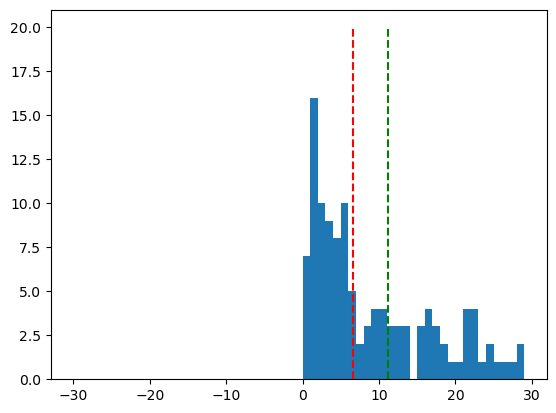

In [164]:
# all_resid = 1000.0*np.array(np.concatenate(all_airmass_mag_resid['r']))
all_resid = 1000.0*np.array(all_airmass_mag_resid['r'][27])
plt.hist(all_resid, bins=np.arange(-30, 30, 1))
plt.vlines(np.nanmedian(all_resid), 0, 20, color='red', linestyle='--')
plt.vlines(np.nanmean(all_resid), 0, 20, color='green', linestyle='--')
plt.show()

In [167]:
# all_airmass_mag_resid['r']

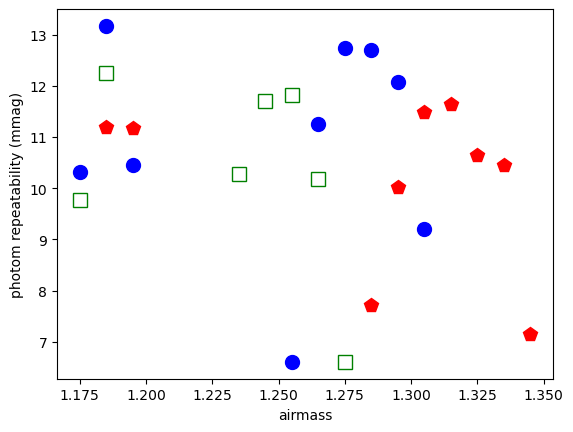

In [168]:
plt.plot(bin_cens, 1000.0*np.array(airmass_mag_std['g']), 'bo', ms=10)
plt.plot(bin_cens, 1000.0*np.array(airmass_mag_std['r']), 'gs', ms=10, fillstyle='none')
plt.plot(bin_cens, 1000.0*np.array(airmass_mag_std['i']), 'rp', ms=10)
plt.xlabel('airmass')
plt.ylabel('photom repeatability (mmag)')
plt.show()

In [132]:
# Transformation to subtract group mean
# stars_r_tmp['normalized_value'] = stars_r_tmp['psfmag'].transform(lambda x: x - x.mean())
stars_r_tmp = stars_r.copy()
stars_r_tmp['norm'] = stars_r_tmp.groupby('obj_index')['psfmag'].transform(lambda x: x - x.mean())
stars_r_tmp
stars_tmp = stars_r_tmp.groupby('obj_index')

In [101]:
# np.nanmean(stars_r_tmp.psfmag.aggregate('std'))
stars_r_tmp.psfmag.count()

obj_index
0.0       35
1.0       30
2.0       24
3.0       37
4.0       33
          ..
4937.0     1
4939.0     1
4940.0     1
4941.0     1
4942.0     1
Name: psfmag, Length: 3471, dtype: int64

## Code scraps

In [74]:
# bins = [1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
bins = np.arange(1, 2, 0.05)
# pd.cut groups things into bins
# "values" tells it which column(s) to apply the "aggfunc" to
stdev_flux_with_airmass = stars_r.pivot_table(index='obj_index', columns=pd.cut(stars_r['airmass'], bins), aggfunc=['std', 'count'],
                                              values='psfmag').fillna(0)


In [75]:
stdev_flux_with_airmass

std                               count              \
airmass   (1.15, 1.2] (1.2, 1.25] (1.25, 1.3] (1.0, 1.05] (1.05, 1.1]   
obj_index                                                               
0.0          0.011686    0.008930    0.009081           0           0   
1.0          0.018740    0.024469    0.023611           0           0   
2.0          0.028184    0.031051    0.034298           0           0   
3.0          0.011618    0.011172    0.011638           0           0   
4.0          0.012516    0.009525    0.010953           0           0   
...               ...         ...         ...         ...         ...   
4943.0       0.000000    0.000000    0.000000           0           0   
4944.0       0.000000    0.000000    0.000000           0           0   
4945.0       0.000000    0.000000    0.000000           0           0   
4946.0       0.000000    0.000000    0.000000           0           0   
4947.0       0.000000    0.000000    0.000000           0           0   

                                                                       ...  \
airmass   (1.1, 1.15] (1.15, 1.2] (1.2, 1.25] (1.25, 1.3] (1.3, 1.35]  ...   
obj_index                                                              ...   
0.0                 0          55          20          35           0  ...   
1.0                 0          55          23          30           0  ...   
2.0                 0          52          27          24           0  ...   
3.0                 0          52          21          37           0  ...   
4.0                 0          50          20          33           0  ...   
...               ...         ...         ...         ...         ...  ...   
4943.0              0           1           0           0           0  ...   
4944.0              0           1           0           0           0  ...   
4945.0              0           0           1           0           0  ...   
4946.0              0           0           1           0           0  ...   
4947.0              0           1           0           0           0  ...   

                                                                       \
airmass   (1.45, 1.5] (1.5, 1.55] (1.55, 1.6] (1.6, 1.65] (1.65, 1.7]   
obj_index                                                               
0.0                 0           0           0           0           0   
1.0                 0           0           0           0           0   
2.0                 0           0           0           0           0   
3.0                 0           0           0           0           0   
4.0                 0           0           0           0           0   
...               ...         ...         ...         ...         ...   
4943.0              0           0           0           0           0   
4944.0              0           0           0           0           0   
4945.0              0           0           0           0           0   
4946.0              0           0           0           0           0   
4947.0              0           0           0           0           0   

                                                                       
airmass   (1.7, 1.75] (1.75, 1.8] (1.8, 1.85] (1.85, 1.9] (1.9, 1.95]  
obj_index                                                              
0.0                 0           0           0           0           0  
1.0                 0           0           0           0           0  
2.0                 0           0           0           0           0  
3.0                 0           0           0           0           0  
4.0                 0           0           0           0           0  
...               ...         ...         ...         ...         ...  
4943.0              0           0           0           0           0  
4944.0              0           0           0           0           0  
4945.0              0           0           0           0           0  
4946.0         

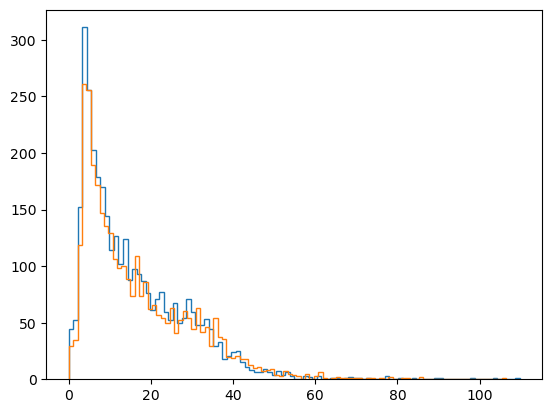

In [38]:
plt.hist(1000.0*stdev_flux_with_airmass['std'].values[:,0], bins=100, histtype='step')
plt.hist(1000.0*stdev_flux_with_airmass['std'].values[:,1], bins=100, histtype='step')
# plt.xscale('log')
# plt.xlim(80, 2e4)
plt.show()

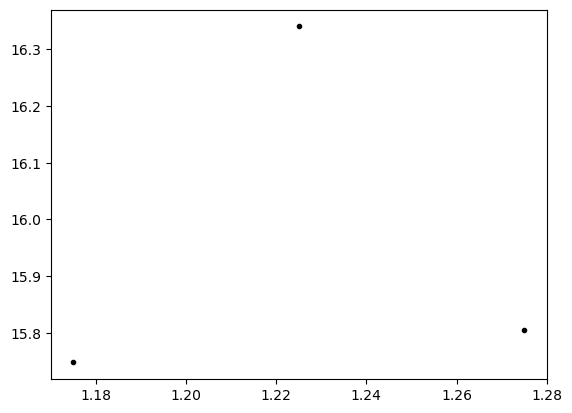

In [46]:
plt.plot([1.175, 1.225, 1.275], [np.nanmean(1000.0*stdev_flux_with_airmass['std'].values[:,0]),
                      np.nanmean(1000.0*stdev_flux_with_airmass['std'].values[:,1]),
                      np.nanmean(1000.0*stdev_flux_with_airmass['std'].values[:,2])], 'k.')
plt.show()

In [49]:
np.sum(np.isfinite(stdev_flux_with_airmass['std'].values[:,2]))

2923

In [50]:
len(stdev_flux_with_airmass)

4240

In [52]:
cats = stdev_flux_with_airmass['std'].describe().keys().categories

In [54]:
for cat in cats:
    print(cat)

(1.0, 1.05]
(1.05, 1.1]
(1.1, 1.15]
(1.15, 1.2]
(1.2, 1.25]
(1.25, 1.3]
(1.3, 1.35]
(1.35, 1.4]
(1.4, 1.45]
(1.45, 1.5]
(1.5, 1.55]
(1.55, 1.6]
(1.6, 1.65]
(1.65, 1.7]
(1.7, 1.75]
(1.75, 1.8]
(1.8, 1.85]
(1.85, 1.9]
(1.9, 1.95]


In [56]:
cat.mid

1.9249999999999998

In [61]:
len(stdev_flux_with_airmass['size'].keys())

19

In [67]:
nperbin = {}

for i in range(len(stdev_flux_with_airmass['size'].keys())):
    oknum = np.sum(stdev_flux_with_airmass['size'].values[:,i] > 0)
    nperbin[i] = oknum

In [68]:
nperbin

{0: 0,
 1: 0,
 2: 0,
 3: 3986,
 4: 3213,
 5: 3471,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0}